# SYRIATEL CUSTOMER CHURN PREDICTION IN TELECOMMUNICATION
# Introduction
This project focuses on exploratory data analysis and machine learning classification to help SyriaTel, a telecommunications company, reduce customer churn. By analyzing behavioral and usage data of its customers, the goal is to uncover patterns that indicate whether a customer is likely to stop doing business with the company. The project will result in a predictive model and business insights that SyriaTel can use to take preemptive actions, improving customer retention and reducing revenue loss.

## 1. BUSINESS UNDERSTANDING
Customer churn is one of the most critical issues faced by telecom companies, as acquiring new customers tends to be far more expensive than retaining existing ones. SyriaTel wants to better understand why customers churn and whether it's possible to predict this behavior in advance. Using historical customer data, we will build a classification model that can identify customers at risk of churning.

### 1.1. Business Problem
SyriaTel is experiencing significant revenue losses due to customer churn. The company is seeking a data-driven approach to identify patterns that lead to churn so they can proactively engage at-risk customers with retention strategies. We have been tasked with building a machine learning model that can predict which customers are likely to churn, as well as providing actionable business recommendations based on the key drivers of this behavior.

### 1.2. Key Business Questions
- What customer attributes are most predictive of churn?

- Are there usage behaviors that indicate higher churn risk (e.g., service calls, charges)?

- Can we build a model that accurately identifies customers who are likely to churn?

- How can SyriaTel use this model to intervene and retain at-risk customers?

## 2. DATA UNDERSTANDING

### 2.1. DATA PREPROCESSING

#### 2.1.1. The Data
The dataset used in this project is the SyriaTel Customer Churn dataset, which includes customer-level information such as service usage, billing, and customer support interactions. The dataset is structured with the following key features:

State, Area Code, International Plan, Voice Mail Plan: Demographic and plan details

Account Length, Number of Customer Service Calls: Engagement metrics

Call Minutes and Charges (Day, Evening, Night, International): Usage and billing information

Churn: The target variable, indicating whether the customer has left the company

#### 2.1.2. DATA PREPARATION
This phase involves transforming raw data into a format suitable for exploratory analysis and model building. The key tasks include:

- Importing Necessary Libraries
Import essential Python libraries such as pandas, numpy, matplotlib, seaborn, scikit-learn, and others needed for data handling, visualization, and modeling.

- Loading and Accessing the Dataset
Load the SyriaTel customer churn dataset.

- Data Cleaning and Preparation

1. Acquiring Necessary Data for Analysis: Identify and retain only the relevant features that contribute to the business problem and target prediction.

2. Handling Missing Values: Check for and address any missing or null values through imputation or removal, depending on the situation.

3. Handling Outliers: Use techniques like IQR or Z-score to identify and address outliers that may affect model performance.

4. Feature Encoding
Convert categorical variables into numerical format using techniques such as One-Hot Encoding or Label Encoding, as appropriate.

5. Feature Scaling
Normalize or standardize numerical features using StandardScaler to prepare for machine learning models that are sensitive to feature scales.

6. Target Variable Analysis
Assess the distribution of the Churn target variable to check for class imbalance. Incase of impalanced classes we can apply techniques such as SMOTE, under-sampling, or class weighting during model training.

7. Train-Test Split
Split the dataset into training and test sets to evaluate model performance objectively, typically using an 80-20 ratio.

8. Feature Selection and Engineering

- Identifying which features are most predictive of churn.

9. Modeling Approach

- We will use Logistic Regression and Decision Tree Classifier to predict customer churn.

- Models will be evaluated using performance metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

- A comparison of both models will determine the most effective approach for SyriaTel’s business needs.


#### Success Criteria
The primary evaluation metric for the classification algorithm is recall, focusing on correctly predicting customers at risk of churning. The ultimate objective is to minimize false negatives, as failing to detect a potential churner is more costly to the business than misclassifying a non-churner. A reliable model should achieve a minimum recall of 80%. However, a model predicting all customers as churners to maximize recall is not valuable, as not all customers will churn. Therefore, precision and accuracy will be monitored as secondary metrics.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay
)

import warnings
warnings.filterwarnings('ignore')


### Loading and Accessing the Dataset

In [3]:
# Accessing the Dataset
df = pd.read_csv('archive/bigml_59c28831336c6604c800002a.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Acquiring Necessary Data for Analysis

In [4]:
df.drop(columns=['phone number', 'state', 'area code'], inplace=True)

### Handling Missing Values

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


From the above infomation we can observe that we don't have any missing values

### Handling Outliers

In [6]:
# Select numerical columns only
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a dictionary to hold outlier counts per column
outlier_summary = {}

# Loop through numerical columns to compute IQR and count outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    count = outliers.shape[0]

    if count > 0:
        outlier_summary[col] = count

# Convert to DataFrame for easier viewing
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Column', 'Number of Outliers'])
outlier_df.sort_values(by='Number of Outliers', ascending=False)

,Column,Number of Outliers
14,customer service calls,267
12,total intl calls,78
13,total intl charge,49
11,total intl minutes,46
8,total night minutes,30
10,total night charge,30
2,total day minutes,25
4,total day charge,25
5,total eve minutes,24
7,total eve charge,24


In [7]:
# Define capping function using IQR
def cap_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

# Apply to selected columns (excluding customer service calls)
cols_to_cap = [
    'total intl calls', 'total intl charge', 'total intl minutes',
    'total night minutes', 'total night charge',
    'total day minutes', 'total day charge',
    'total eve minutes', 'total eve charge',
    'total day calls', 'total night calls', 'total eve calls'
]

for col in cols_to_cap:
    cap_outliers(col)

- Worked with Interquatile range(IQR) since some colums like total day minutes, total intl charge, and customer service calls are not normally distributed



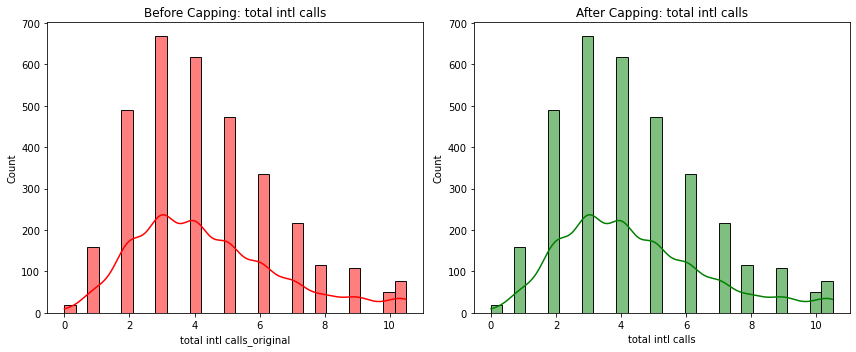

In [8]:
# Backup original column
df['total intl calls_original'] = df['total intl calls']

# Visualize before capping
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['total intl calls_original'], kde=True, bins=30, color='red')
plt.title('Before Capping: total intl calls')

# Apply capping
Q1 = df['total intl calls'].quantile(0.25)
Q3 = df['total intl calls'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df['total intl calls'] = df['total intl calls'].clip(lower, upper)

# Visualize after capping
plt.subplot(1, 2, 2)
sns.histplot(df['total intl calls'], kde=True, bins=30, color='green')
plt.title('After Capping: total intl calls')

plt.tight_layout()
plt.show()

### Feature Encoding   

In [9]:
df.dtypes

account length                 int64
international plan            object
voice mail plan               object
number vmail messages          int64
total day minutes            float64
total day calls              float64
total day charge             float64
total eve minutes            float64
total eve calls              float64
total eve charge             float64
total night minutes          float64
total night calls              int64
total night charge           float64
total intl minutes           float64
total intl calls             float64
total intl charge            float64
customer service calls         int64
churn                           bool
total intl calls_original    float64
dtype: object

In [10]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to the relevant columns
df['international plan'] = le.fit_transform(df['international plan'])
df['voice mail plan'] = le.fit_transform(df['voice mail plan'])
df['churn'] = le.fit_transform(df['churn'])

df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total intl calls_original
0,128,0,1,25,265.1,110.0,45.07,197.40,99.0,16.78,244.7,91,11.01,10.0,3.0,2.70,1,0,3.0
1,107,0,1,26,161.6,123.0,27.47,195.50,103.0,16.62,254.4,103,11.45,13.7,3.0,3.70,1,0,3.0
2,137,0,0,0,243.4,114.0,41.38,121.20,110.0,10.30,162.6,104,7.32,12.2,5.0,3.29,0,0,5.0
3,84,1,0,0,299.4,71.0,50.90,63.55,88.0,5.40,196.9,89,8.86,6.6,7.0,1.78,2,0,7.0
4,75,1,0,0,166.7,113.0,28.34,148.30,122.0,12.61,186.9,121,8.41,10.1,3.0,2.73,3,0,3.0


### Feature Scaling

In [11]:
# Drop the target column and any non-feature columns
X = df.drop(columns=['churn'])

# Target variable
y = df['churn']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Optional: convert back to a DataFrame with the original column names
import pandas as pd
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Show the first few rows
X_scaled_df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,total intl calls_original
0,0.676489,-0.327580,1.617086,1.234883,1.575128,0.479660,1.575396,-0.071627,-0.057407,-0.071441,0.875492,-0.468006,0.874825,-0.093573,-0.627131,-0.094399,-0.427932,-0.627131
1,0.149065,-0.327580,1.617086,1.307948,-0.336439,1.134217,-0.336715,-0.109330,0.145067,-0.108793,1.069062,0.149253,1.069958,1.266421,-0.627131,1.267378,-0.427932,-0.627131
2,0.902529,-0.327580,-0.618396,-0.591760,1.174346,0.681062,1.174505,-1.583717,0.499397,-1.584225,-0.762868,0.200691,-0.761631,0.715072,0.253150,0.709049,-1.188218,0.253150
3,-0.428590,3.052685,-0.618396,-0.591760,2.208623,-1.484012,2.208783,-2.727707,-0.614211,-2.728151,-0.078389,-0.570882,-0.078665,-1.343298,1.133431,-1.347234,0.332354,1.133431
4,-0.654629,3.052685,-0.618396,-0.591760,-0.242246,0.630711,-0.242196,-1.045953,1.106820,-1.044945,-0.277945,1.075140,-0.278233,-0.056817,-0.627131,-0.053546,1.092641,-0.627131


### Target Variable Analysis
churn is the target variable for this classification project. Therefore, we have to explore its characteristics, distribution, and properties without considering relationship with other variables

0    2850
1     483
Name: churn, dtype: int64


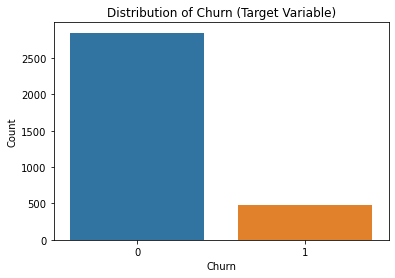

In [12]:
churn_counts = df['churn'].value_counts()
print(churn_counts)

# Plot distribution
sns.countplot(data=df, x='churn')
plt.title('Distribution of Churn (Target Variable)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

The bar chart above illustrates the distribution of the target variable "churn," with counts labeled atop each bar. The chart reveals a class imbalance, as shown by the uneven distribution of observations within the target class. Specifically, 85.51% of the data belongs to the "False" class, while the "True" class represents 14.49% of the dataset.

### SMOTE (Synthetic Minority Oversampling Technique)
To balance the dataset before training we use SMOTE.

We used train dataset this ensures the model learns from a balanced training set, while the test set remains untouched for fair evaluation.

In [13]:
from imblearn.over_sampling import SMOTE

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: 0    2280
1     386
Name: churn, dtype: int64
After SMOTE: 1    2280
0    2280
Name: churn, dtype: int64


### Feature Selection and engineering

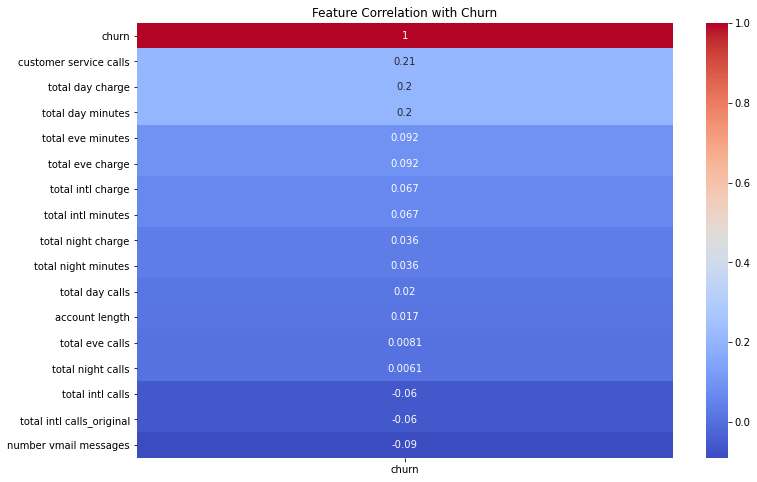

In [14]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation = numeric_df.corr()

# Visualize correlation with churn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation[['churn']].sort_values(by='churn', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Churn')
plt.show()

- The highest correlation is between churn and International plan.
- The weakest correlation is between churn and number vmail messages.

 #### Feature Importance using Tree-based Model

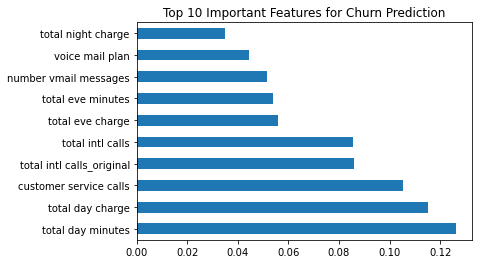

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train a basic Random Forest on resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Plot feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a bar chart
feat_importance = pd.Series(importances, index=feature_names)
feat_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features for Churn Prediction')
plt.show()

- Tree-based models naturally provide a ranking of features based on how much they improve split quality hence the best choice for this task.

- From above visualisation we can observe that "total day minutes" is the most important feature predicton followed by total day charge.

## 3. Modeling Approach
#### Logistic regression and Decision Tree Train models

In [16]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# prediction on test set
y_pred_logreg = log_reg.predict(X_test)

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# prediction on test set
y_pred_dt = dt.predict(X_test)

### Model evaluation

In [17]:
# Classification reports
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))

# AUC scores
print("Logistic Regression AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))
print("Decision Tree AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.92      0.66      0.77       570
           1       0.25      0.67      0.36        97

    accuracy                           0.66       667
   macro avg       0.59      0.66      0.57       667
weighted avg       0.82      0.66      0.71       667

Decision Tree:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       570
           1       0.47      0.67      0.55        97

    accuracy                           0.84       667
   macro avg       0.71      0.77      0.73       667
weighted avg       0.87      0.84      0.85       667

Logistic Regression AUC: 0.7175981190088624
Decision Tree AUC: 0.7710164586724543


- Decision Tree outperforms Logistic Regression across all key metrics, including accuracy, F1-score, and AUC.

- Recall for class 1 (churned customers) is the same (0.67) for both models, which means both are equally good at catching churners but the Decision Tree is far more precise.

- Logistic Regression has very low precision (0.25), meaning many false positives — it incorrectly predicts non-churners as churners too often.

- AUC scores confirm that the Decision Tree better distinguishes between classes.

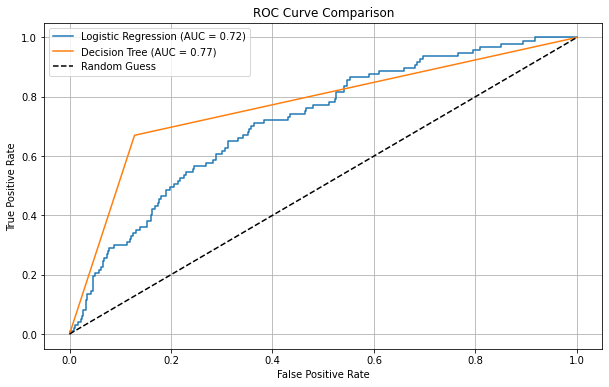

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
logreg_probs = log_reg.predict_proba(X_test)[:, 1]
dt_probs = dt.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)

# Plot both ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, logreg_probs):.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, dt_probs):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

Based on ROC curve above we can observe that Decision tree performs better than Logistic Regression hence a better predictor

### Checking if the Decision tree model is overitting

In [19]:
from sklearn.metrics import classification_report, roc_auc_score

# Training set predictions
y_train_pred = model.predict(X_train_resampled)
y_train_proba = model.predict_proba(X_train_resampled)[:, 1]

# Test set predictions (already available)
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

# Training metrics
print("Training Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))
print("Training AUC:", roc_auc_score(y_train_resampled, y_train_proba))

# Test metrics (for comparison)
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test AUC:", roc_auc_score(y_test, y_test_proba))

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2280
           1       1.00      1.00      1.00      2280

    accuracy                           1.00      4560
   macro avg       1.00      1.00      1.00      4560
weighted avg       1.00      1.00      1.00      4560

Training AUC: 0.9999999999999999
Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       570
           1       0.67      0.66      0.66        97

    accuracy                           0.90       667
   macro avg       0.80      0.80      0.80       667
weighted avg       0.90      0.90      0.90       667

Test AUC: 0.8720926026406223


- Based on above results we can see that Decision tree model is overfitting.
- Training Accuracy of 100% & AUC of ~1.0. This is a strong sign of overfitting, model has likely memorized the training data.
- Test Performance Drop with Accuracy of 90% (good) and AUC of 0.87
- Precision/Recall for class 1 (churners): 67% / 66%. While these are decent, they are significantly lower than perfect train metrics.



### Hypeparameter tuning

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid to search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20, 50]
}

# Create Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid,
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

# Fit on training data (use resampled training set)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

# Re-train the model using best params
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   24.0s


Best Parameters: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best ROC AUC Score: 0.9360466682056018


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   26.2s finished


ROC AUC Score of 0.936 is very good, indicating  model performs well in distinguishing between churned and non-churned customers during cross-validation.

### Evaluation 

Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       570
           1       0.56      0.72      0.63        97

    accuracy                           0.88       667
   macro avg       0.75      0.81      0.78       667
weighted avg       0.89      0.88      0.88       667

Test AUC Score: 0.8299963827093507


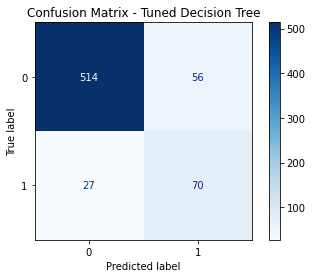

In [21]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # for AUC

# Classification Report
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

# AUC Score
auc = roc_auc_score(y_test, y_proba)
print("Test AUC Score:", auc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.show()

- We can observe an Accuracy of 0.88 which is Strong overall performance.

- AUC Score of 0.83 which shows Good ability to distinguish between churners and non-churners.

- Class 0 (No Churn) has excellent performance (high precision & recall).

- Class 1 (Churn) has Performance improved significantly after tuning—recall is now 0.72, meaning the model captures 72% of actual churners (up from 66%).

- The model no longer overfits—training and test performance are now reasonably aligned.

- There’s still a slight trade-off, better recall (catching churners) comes with slightly lower precision (more false positives), which is acceptable in churn prediction.


## Conclusion

This study developed a predictive machine learning model to address SyriaTel's challenge of rising customer churn. Using the SyriaTel dataset, we explored feature importance, addressed class imbalance using SMOTE, trained and tuned classification models, and evaluated them using precision, recall, F1-score, and AUC.

Key findings:

- A Decision Tree Classifier with hyperparameter tuning achieved a strong performance with an accuracy of 88%, a recall of 72% for churners, and an AUC score of 0.83 on the test set.

- The Logistic Regression model, while simpler, underperformed with lower recall and AUC, indicating that a nonlinear model like a decision tree is more suitable for capturing the complexity of churn patterns in this dataset.

- Feature importance analysis revealed that "total day minutes," "total day charge," "number of customer service calls," and international plan subscription were among the most predictive features of churn.




- The analysis showed that some customers characteristics were likely to contribute to churn. People who use their mobile phones during the day for many minutes and charges, often calling the customer service centre or using an international plan are likely to cancel their service. Further, having a voicemail plan and higher night-time usage, turn out to have a moderate negative impact on churn risk.

- Meanwhile on the behavior aspect, people using phone frequently during the day and those who frequently call the customer service are the most likely to churn. This might be because of poor service quality or some unsolved difficulties they faced in the past. Another one is that customers with international plans tends to churn more frequently, the reasons could be associated to the prices and/or the quality of the call to international destinations.

- We were even able to build a machine learning model that we could use to predict customers most likely to churn. To summarize, there is a high accuracy after re tuning with Decision Tree model particularly in identifying the churners with the recall rate of 72%. This means that the model can further be helpful in identifying customers who are in the process of churning and can attend to them before they abandon the service.

- From the above model, SyriaTel can benefit in several ways as follows; It can be incorporated in the customer management system to alert the firm when customers are considering to leave the firm. They can then launch retention campaigns on those customers informing them of the various discounts, superior service plans or attractive loyalty offers in the market. The company should also address high volume callers and possibly have special attention given to such frequent callers while the company needs to periodically evaluate its international call plan offers to ensure they meet the needs and demands of the customers and reduce churn rates.

## Recommendations
- Operational Integration: Deploy the model in SyriaTel’s operational systems to flag high-risk customers monthly or weekly.

- Customer Support Focus: Train support teams to handle frequent callers with care, as they are more likely to churn.

- Marketing Targeting: Direct retention incentives toward customers with high day-time usage or those on international plans.

- Continuous Monitoring: Regularly retrain the model with updated data to maintain performance as customer behavior evolves.